In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

file_path = r"D:\OneDrive\0. Code\TDN\data\interim\Trung\DGMS_BCSVH_sanluong_trung.xlsx"

print("Đã import thành công các thư viện cần thiết!")

Đã import thành công các thư viện cần thiết!


In [2]:
data = pd.read_excel(file_path)# Ensure the data is loaded correctly
data

,TD_THAMCHIEU,Ngày,SL,P.đặt,QVE
0,BUON_TUA_SRAH,2024-08-12,0.547000,167.67,90.54
1,BUON_TUA_SRAH,2024-08-13,0.492100,167.67,92.54
2,BUON_TUA_SRAH,2024-08-14,0.566200,167.67,96.33
3,BUON_TUA_SRAH,2024-08-15,0.561100,167.67,103.71
4,BUON_TUA_SRAH,2024-08-16,0.562900,167.67,101.79
...,...,...,...,...,...
3602,VINH_SON,2025-05-29,1.081920,94.80,1.80
3603,VINH_SON,2025-05-30,0.967930,94.80,1.07
3604,VINH_SON,2025-05-30,0.967930,94.80,2.19
3605,VINH_SON,2025-05-31,0.911945,94.80,0.80


In [3]:
# Chuyển đổi cột Ngày sang định dạng datetime
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%Y.%m.%d')

# Tạo cột Tháng từ cột Ngày
data['Tháng'] = data['Ngày'].dt.to_period('M')

# Nhóm dữ liệu theo TD_THAMCHIEU và Tháng, tính tổng SL và trung bình QVE
result = data.groupby(['TD_THAMCHIEU', 'Tháng']).agg({
    'SL': 'sum',
    'QVE': 'mean'
}).reset_index()

# Hiển thị kết quả
print("Dữ liệu sau khi nhóm theo TD_THAMCHIEU và Tháng:")
result

Dữ liệu sau khi nhóm theo TD_THAMCHIEU và Tháng:


,TD_THAMCHIEU,Tháng,SL,QVE
0,BUON_TUA_SRAH,2024-08,27.257810,137.916500
1,BUON_TUA_SRAH,2024-09,106.610945,240.575333
2,BUON_TUA_SRAH,2024-10,103.374720,137.512581
3,BUON_TUA_SRAH,2024-11,78.570830,109.274667
4,BUON_TUA_SRAH,2024-12,64.997700,112.098065
...,...,...,...,...
98,VINH_SON,2025-01,95.753800,4.208710
99,VINH_SON,2025-02,68.264790,0.759464
100,VINH_SON,2025-03,67.242650,0.320645
101,VINH_SON,2025-04,53.127070,0.417167


In [4]:
# BƯỚC 1: KHÁM PHÁ DỮ LIỆU CỞ BẢN

print("=== THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU ===")
print(f"Số lượng bản ghi: {len(result)}")
print(f"Số nhà máy: {result['TD_THAMCHIEU'].nunique()}")
print(f"Khoảng thời gian: {result['Tháng'].min()} đến {result['Tháng'].max()}")
print(f"Danh sách nhà máy: {list(result['TD_THAMCHIEU'].unique())}")

print("\n=== THỐNG KÊ MÔ TẢ ===")
print(result.describe())

print("\n=== KIỂM TRA GIÁ TRỊ NULL ===")
print(result.isnull().sum())

print("\n=== THỐNG KÊ THEO TỪNG NHÀ MÁY ===")
stats_by_plant = result.groupby('TD_THAMCHIEU').agg({
    'SL': ['count', 'mean', 'std', 'min', 'max'],
    'QVE': ['mean', 'std', 'min', 'max']
}).round(2)
print(stats_by_plant)


=== THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU ===
Số lượng bản ghi: 103
Số nhà máy: 11
Khoảng thời gian: 2024-08 đến 2025-05
Danh sách nhà máy: ['BUON_TUA_SRAH', 'DAK_DRINH', 'DAK_RTIH', 'HUONG_DIEN', 'IALY', 'QUANGTRI', 'SONG_BA_HA', 'SONG_BUNG_2', 'SONG_TRANH_2', 'THUONG_KONTUM', 'VINH_SON']

=== THỐNG KÊ MÔ TẢ ===
               SL         QVE
count  103.000000  103.000000
mean    60.057493   80.700500
std     45.411323   99.150555
min      1.494990    0.320645
25%     26.901780   12.059091
50%     49.299635   39.281429
75%     80.625930  112.725334
max    223.280603  443.293333

=== KIỂM TRA GIÁ TRỊ NULL ===
TD_THAMCHIEU    0
Tháng           0
SL              0
QVE             0
dtype: int64

=== THỐNG KÊ THEO TỪNG NHÀ MÁY ===
                 SL                                   QVE                 \
              count    mean    std    min     max    mean     std    min   
TD_THAMCHIEU                                                               
BUON_TUA_SRAH    10   52.69  33.43  17.42 

In [5]:
# BƯỚC 2: PHÂN TÍCH TƯƠNG QUAN

from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler

print("=== PHÂN TÍCH TƯƠNG QUAN TỔNG THỂ ===")

# Tương quan Pearson (tuyến tính)
pearson_corr, pearson_p = pearsonr(result['QVE'], result['SL'])
print(f"Tương quan Pearson QVE-SL: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")

# Tương quan Spearman (phi tuyến tính)
spearman_corr, spearman_p = spearmanr(result['QVE'], result['SL'])
print(f"Tương quan Spearman QVE-SL: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")

print("\n=== TƯƠNG QUAN THEO TỪNG NHÀ MÁY ===")
correlation_by_plant = {}
for plant in result['TD_THAMCHIEU'].unique():
    plant_data = result[result['TD_THAMCHIEU'] == plant]
    if len(plant_data) > 2:  # Cần ít nhất 3 điểm để tính tương quan
        corr, p_val = pearsonr(plant_data['QVE'], plant_data['SL'])
        correlation_by_plant[plant] = {'correlation': corr, 'p_value': p_val, 'n_points': len(plant_data)}
        print(f"{plant}: r={corr:.4f} (p={p_val:.4f}, n={len(plant_data)})")

# Ma trận tương quan
correlation_matrix = result[['SL', 'QVE']].corr()
print(f"\n=== MA TRẬN TƯƠNG QUAN ===")
print(correlation_matrix)


=== PHÂN TÍCH TƯƠNG QUAN TỔNG THỂ ===
Tương quan Pearson QVE-SL: 0.3877 (p-value: 0.0001)
Tương quan Spearman QVE-SL: 0.4091 (p-value: 0.0000)

=== TƯƠNG QUAN THEO TỪNG NHÀ MÁY ===
BUON_TUA_SRAH: r=0.8027 (p=0.0052, n=10)
DAK_DRINH: r=0.8342 (p=0.0027, n=10)
DAK_RTIH: r=0.8668 (p=0.0012, n=10)
HUONG_DIEN: r=0.8715 (p=0.0010, n=10)
IALY: r=0.5836 (p=0.0765, n=10)
QUANGTRI: r=0.5308 (p=0.1145, n=10)
SONG_BA_HA: r=0.8126 (p=0.0043, n=10)
SONG_BUNG_2: r=0.6303 (p=0.0508, n=10)
SONG_TRANH_2: r=0.8614 (p=0.0014, n=10)
THUONG_KONTUM: r=0.8795 (p=0.3157, n=3)
VINH_SON: r=0.8694 (p=0.0011, n=10)

=== MA TRẬN TƯƠNG QUAN ===
           SL       QVE
SL   1.000000  0.387662
QVE  0.387662  1.000000


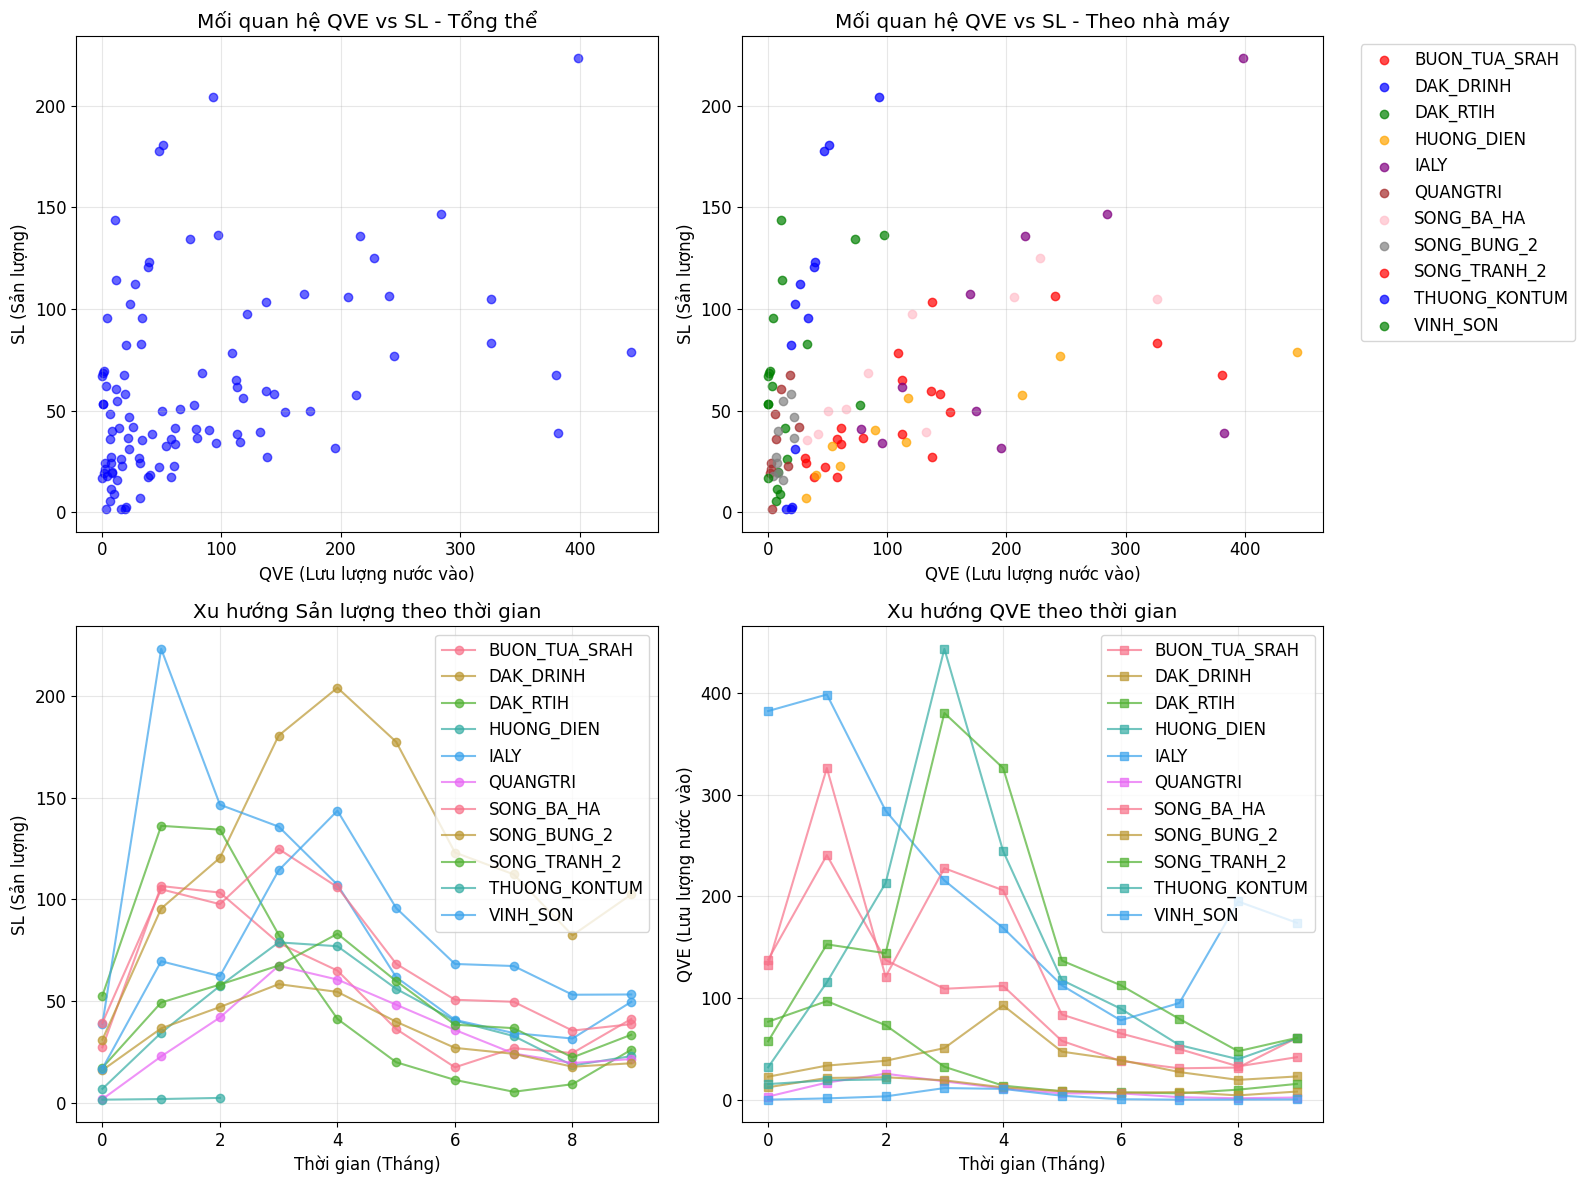

In [6]:
# BƯỚC 3: TRỰC QUAN HÓA MỐI QUAN HỆ

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot tổng thể
axes[0,0].scatter(result['QVE'], result['SL'], alpha=0.6, c='blue')
axes[0,0].set_xlabel('QVE (Lưu lượng nước vào)')
axes[0,0].set_ylabel('SL (Sản lượng)')
axes[0,0].set_title('Mối quan hệ QVE vs SL - Tổng thể')
axes[0,0].grid(True, alpha=0.3)

# 2. Scatter plot theo từng nhà máy
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, plant in enumerate(result['TD_THAMCHIEU'].unique()):
    plant_data = result[result['TD_THAMCHIEU'] == plant]
    axes[0,1].scatter(plant_data['QVE'], plant_data['SL'], 
                     label=plant, alpha=0.7, c=colors[i % len(colors)])
axes[0,1].set_xlabel('QVE (Lưu lượng nước vào)')
axes[0,1].set_ylabel('SL (Sản lượng)')
axes[0,1].set_title('Mối quan hệ QVE vs SL - Theo nhà máy')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, alpha=0.3)

# 3. Biểu đồ thời gian SL
result_sorted = result.sort_values(['TD_THAMCHIEU', 'Tháng'])
for i, plant in enumerate(result['TD_THAMCHIEU'].unique()):
    plant_data = result_sorted[result_sorted['TD_THAMCHIEU'] == plant]
    axes[1,0].plot(range(len(plant_data)), plant_data['SL'], 
                   label=plant, marker='o', alpha=0.7)
axes[1,0].set_xlabel('Thời gian (Tháng)')
axes[1,0].set_ylabel('SL (Sản lượng)')
axes[1,0].set_title('Xu hướng Sản lượng theo thời gian')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Biểu đồ thời gian QVE
for i, plant in enumerate(result['TD_THAMCHIEU'].unique()):
    plant_data = result_sorted[result_sorted['TD_THAMCHIEU'] == plant]
    axes[1,1].plot(range(len(plant_data)), plant_data['QVE'], 
                   label=plant, marker='s', alpha=0.7)
axes[1,1].set_xlabel('Thời gian (Tháng)')
axes[1,1].set_ylabel('QVE (Lưu lượng nước vào)')
axes[1,1].set_title('Xu hướng QVE theo thời gian')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
# BƯỚC 4: FEATURE ENGINEERING CHO DỰ BÁO

# Tạo biến thời gian số
result['Tháng_str'] = result['Tháng'].astype(str)
result['Năm'] = result['Tháng'].dt.year
result['Tháng_num'] = result['Tháng'].dt.month

# Sắp xếp dữ liệu theo thời gian
result_sorted = result.sort_values(['TD_THAMCHIEU', 'Tháng']).reset_index(drop=True)

# Tạo biến lag (giá trị kỳ trước) cho mỗi nhà máy
def create_lag_features(df, target_col, n_lags=3):
    df_new = df.copy()
    for plant in df['TD_THAMCHIEU'].unique():
        plant_mask = df['TD_THAMCHIEU'] == plant
        plant_data = df[plant_mask].copy()
        
        for lag in range(1, n_lags + 1):
            col_name = f'{target_col}_lag_{lag}'
            plant_data[col_name] = plant_data[target_col].shift(lag)
            df_new.loc[plant_mask, col_name] = plant_data[col_name]
    
    return df_new

# Tạo lag features cho QVE và SL
result_features = create_lag_features(result_sorted, 'QVE', n_lags=2)
result_features = create_lag_features(result_features, 'SL', n_lags=2)

# Tạo rolling averages
def create_rolling_features(df, target_col, windows=[2, 3]):
    df_new = df.copy()
    for plant in df['TD_THAMCHIEU'].unique():
        plant_mask = df['TD_THAMCHIEU'] == plant
        plant_data = df[plant_mask].copy()
        
        for window in windows:
            col_name = f'{target_col}_rolling_{window}'
            plant_data[col_name] = plant_data[target_col].rolling(window=window, min_periods=1).mean()
            df_new.loc[plant_mask, col_name] = plant_data[col_name]
    
    return df_new

result_features = create_rolling_features(result_features, 'QVE', windows=[2, 3])
result_features = create_rolling_features(result_features, 'SL', windows=[2, 3])

# Tạo ratio QVE/SL
result_features['QVE_SL_ratio'] = result_features['QVE'] / (result_features['SL'] + 1e-6)

print("=== FEATURE ENGINEERING HOÀN THÀNH ===")
print(f"Số cột ban đầu: {len(result.columns)}")
print(f"Số cột sau khi tạo features: {len(result_features.columns)}")
print("\nCác features mới được tạo:")
new_features = [col for col in result_features.columns if col not in result.columns]
print(new_features)

print("\n=== XEM MẪU DỮ LIỆU SAU KHI FEATURE ENGINEERING ===")
print(result_features[['TD_THAMCHIEU', 'Tháng', 'SL', 'QVE', 'QVE_lag_1', 'SL_lag_1', 'QVE_rolling_2']].head(10))


=== FEATURE ENGINEERING HOÀN THÀNH ===
Số cột ban đầu: 7
Số cột sau khi tạo features: 16

Các features mới được tạo:
['QVE_lag_1', 'QVE_lag_2', 'SL_lag_1', 'SL_lag_2', 'QVE_rolling_2', 'QVE_rolling_3', 'SL_rolling_2', 'SL_rolling_3', 'QVE_SL_ratio']

=== XEM MẪU DỮ LIỆU SAU KHI FEATURE ENGINEERING ===
    TD_THAMCHIEU    Tháng          SL         QVE   QVE_lag_1    SL_lag_1  \
0  BUON_TUA_SRAH  2024-08   27.257810  137.916500         NaN         NaN   
1  BUON_TUA_SRAH  2024-09  106.610945  240.575333  137.916500   27.257810   
2  BUON_TUA_SRAH  2024-10  103.374720  137.512581  240.575333  106.610945   
3  BUON_TUA_SRAH  2024-11   78.570830  109.274667  137.512581  103.374720   
4  BUON_TUA_SRAH  2024-12   64.997700  112.098065  109.274667   78.570830   
5  BUON_TUA_SRAH  2025-01   36.217340   58.059032  112.098065   64.997700   
6  BUON_TUA_SRAH  2025-02   17.421070   38.395000   58.059032   36.217340   
7  BUON_TUA_SRAH  2025-03   26.827725   31.148387   38.395000   17.421070   
8  B

In [8]:
# BƯỚC 5: XÂY DỰNG MÔ HÌNH DỰ BÁO

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Chuẩn bị dữ liệu - loại bỏ các hàng có NaN
clean_data = result_features.dropna()

print(f"Dữ liệu sau khi loại bỏ NaN: {len(clean_data)} hàng")

# Tách theo từng nhà máy và xây dựng mô hình riêng
models_results = {}

for plant in clean_data['TD_THAMCHIEU'].unique():
    print(f"\n=== XÂY DỰNG MÔ HÌNH CHO {plant} ===")
    
    plant_data = clean_data[clean_data['TD_THAMCHIEU'] == plant].copy()
    
    if len(plant_data) < 5:  # Cần ít nhất 5 điểm để xây dựng mô hình
        print(f"Không đủ dữ liệu cho {plant} (chỉ có {len(plant_data)} điểm)")
        continue
    
    # Chọn features để dự báo SL
    feature_cols = ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']
    available_features = [col for col in feature_cols if col in plant_data.columns]
    
    X = plant_data[available_features]
    y = plant_data['SL']
    
    # Chia train/test (70/30)
    if len(plant_data) >= 6:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1], y[-1:]
    
    # Mô hình 1: Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_r2 = r2_score(y_test, lr_pred) if len(y_test) > 1 else 0
    lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
    
    # Mô hình 2: Polynomial Regression (degree 2)
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    poly_pred = poly_model.predict(X_test_poly)
    poly_r2 = r2_score(y_test, poly_pred) if len(y_test) > 1 else 0
    poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
    
    # Lưu kết quả
    models_results[plant] = {
        'data_points': len(plant_data),
        'linear_r2': lr_r2,
        'linear_rmse': lr_rmse,
        'poly_r2': poly_r2,
        'poly_rmse': poly_rmse,
        'features_used': available_features,
        'models': {
            'linear': lr_model,
            'poly': (poly_model, poly_features)
        }
    }
    
    print(f"Linear R²: {lr_r2:.4f}, RMSE: {lr_rmse:.4f}")
    print(f"Polynomial R²: {poly_r2:.4f}, RMSE: {poly_rmse:.4f}")
    print(f"Features sử dụng: {available_features}")

print("\n=== TỔNG KẾT KẾT QUẢ MÔ HÌNH ===")
for plant, results in models_results.items():
    print(f"{plant}: Linear R²={results['linear_r2']:.3f}, Poly R²={results['poly_r2']:.3f}")


Dữ liệu sau khi loại bỏ NaN: 81 hàng

=== XÂY DỰNG MÔ HÌNH CHO BUON_TUA_SRAH ===
Linear R²: 0.5881, RMSE: 20.4661
Polynomial R²: -2.7860, RMSE: 62.0476
Features sử dụng: ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']

=== XÂY DỰNG MÔ HÌNH CHO DAK_DRINH ===
Linear R²: 0.6563, RMSE: 17.8621
Polynomial R²: -22.5321, RMSE: 147.8002
Features sử dụng: ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']

=== XÂY DỰNG MÔ HÌNH CHO DAK_RTIH ===
Linear R²: -0.9708, RMSE: 74.3957
Polynomial R²: -154.2561, RMSE: 660.3115
Features sử dụng: ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']

=== XÂY DỰNG MÔ HÌNH CHO HUONG_DIEN ===
Linear R²: -2.0141, RMSE: 32.6977
Polynomial R²: -177.4518, RMSE: 251.5939
Features sử dụng: ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']

=== XÂY DỰNG MÔ HÌNH CHO IALY ===
Linear R²: 0.7356, RMSE: 26.0254
Polynomial R²: -0.8121, RMSE: 68.1337
Features sử dụng: ['QVE', 'QVE_lag_1', 'QVE_rolling_2', 'Tháng_num']

=== XÂY DỰNG MÔ HÌNH CHO QUANGTRI ===
Linear R²: -0.8

=== DỰ BÁO SẢN LƯỢNG CHO 3 THÁNG TIẾP THEO ===

=== DỰ BÁO CHO BUON_TUA_SRAH BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 25.51
Tháng 7: SL dự báo = 25.03
Tháng 8: SL dự báo = 24.54

=== DỰ BÁO CHO DAK_DRINH BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 98.61
Tháng 7: SL dự báo = 101.79
Tháng 8: SL dự báo = 104.97

=== DỰ BÁO CHO DAK_RTIH BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 14.53
Tháng 7: SL dự báo = 13.20
Tháng 8: SL dự báo = 11.87

=== DỰ BÁO CHO HUONG_DIEN BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 17.67
Tháng 7: SL dự báo = 15.42
Tháng 8: SL dự báo = 13.17

=== DỰ BÁO CHO IALY BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 61.41
Tháng 7: SL dự báo = 66.29
Tháng 8: SL dự báo = 71.18

=== DỰ BÁO CHO QUANGTRI BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 19.87
Tháng 7: SL dự báo = 19.21
Tháng 8: SL dự báo = 18.55

=== DỰ BÁO CHO SONG_BA_HA BẰNG MÔ HÌNH Linear ===
Tháng 6: SL dự báo = 37.86
Tháng 7: SL dự báo = 37.49
Tháng 8: SL dự báo = 37.11

=== DỰ BÁO CHO SONG_BUNG_2 BẰNG MÔ

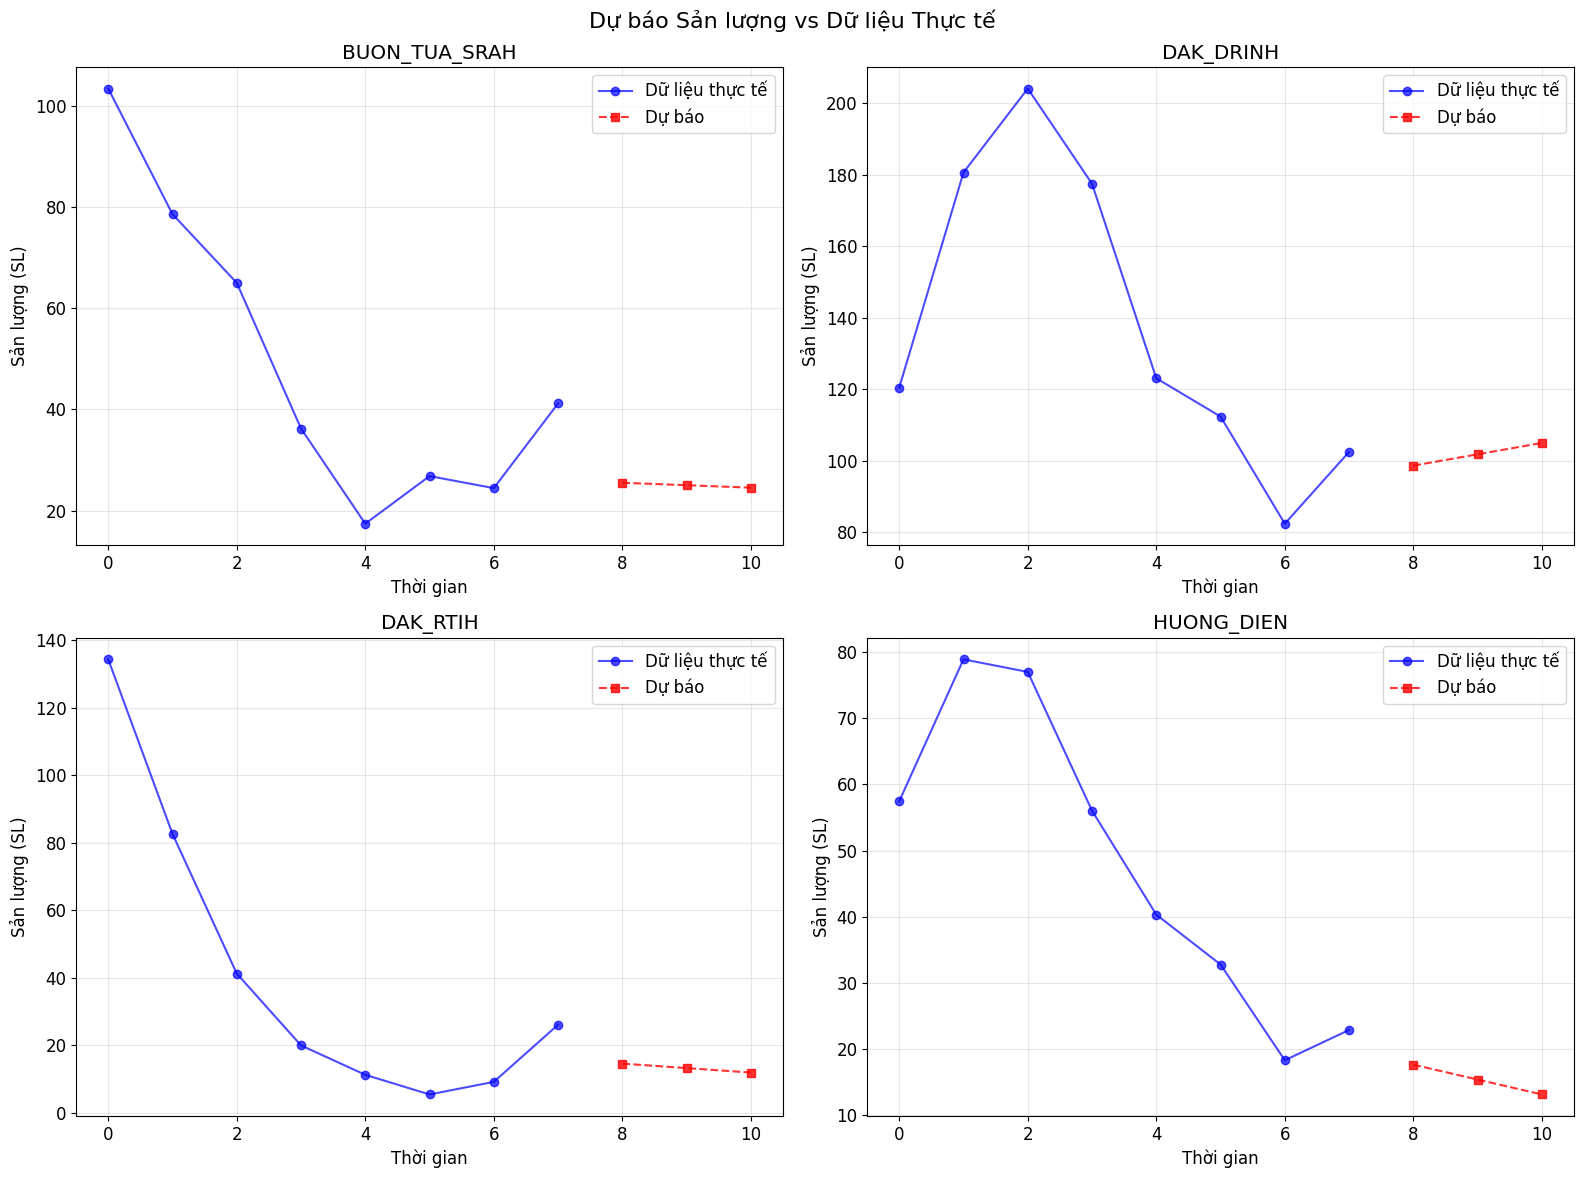

In [9]:
# BƯỚC 6: DỰ BÁO VÀ ĐÁNH GIÁ MÔ HÌNH

# Hàm dự báo cho các tháng tiếp theo
def forecast_next_months(plant_name, n_months=3):
    if plant_name not in models_results:
        print(f"Không có mô hình cho {plant_name}")
        return None
    
    # Lấy dữ liệu gần nhất của nhà máy
    latest_data = clean_data[clean_data['TD_THAMCHIEU'] == plant_name].tail(n_months * 2)
    
    if len(latest_data) == 0:
        print(f"Không có dữ liệu cho {plant_name}")
        return None
    
    # Lấy mô hình tốt nhất (dựa trên R²)
    results = models_results[plant_name]
    if results['poly_r2'] > results['linear_r2']:
        model, poly_features = results['models']['poly']
        model_type = 'Polynomial'
    else:
        model = results['models']['linear']
        poly_features = None
        model_type = 'Linear'
    
    print(f"\n=== DỰ BÁO CHO {plant_name} BẰNG MÔ HÌNH {model_type} ===")
    
    # Giả định QVE cho các tháng tới (sử dụng trung bình của 3 tháng gần nhất)
    avg_qve = latest_data['QVE'].tail(3).mean()
    latest_month = latest_data['Tháng_num'].iloc[-1]
    
    forecasts = []
    for i in range(1, n_months + 1):
        next_month = (latest_month + i - 1) % 12 + 1  # Wrap around cho tháng
        
        # Tạo features cho dự báo
        features = {
            'QVE': avg_qve,
            'QVE_lag_1': avg_qve,  # Giả định
            'QVE_rolling_2': avg_qve,  # Giả định
            'Tháng_num': next_month
        }
        
        # Chọn features có trong mô hình
        feature_values = [features[col] for col in results['features_used']]
        X_forecast = np.array(feature_values).reshape(1, -1)
        
        # Dự báo
        if poly_features:
            X_forecast = poly_features.transform(X_forecast)
        
        forecast = model.predict(X_forecast)[0]
        forecasts.append({
            'Tháng': next_month,
            'SL_dự_báo': forecast,
            'QVE_giả_định': avg_qve
        })
        
        print(f"Tháng {next_month}: SL dự báo = {forecast:.2f}")
    
    return forecasts

# Thực hiện dự báo cho từng nhà máy
print("=== DỰ BÁO SẢN LƯỢNG CHO 3 THÁNG TIẾP THEO ===")
forecasts_all = {}

for plant in models_results.keys():
    forecasts_all[plant] = forecast_next_months(plant, n_months=3)

# Trực quan hóa kết quả dự báo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dự báo Sản lượng vs Dữ liệu Thực tế', fontsize=16)

plot_idx = 0
for plant in list(models_results.keys())[:4]:  # Chỉ plot 4 nhà máy đầu
    row, col = plot_idx // 2, plot_idx % 2
    
    plant_data = clean_data[clean_data['TD_THAMCHIEU'] == plant]
    
    # Plot dữ liệu thực tế
    axes[row, col].plot(range(len(plant_data)), plant_data['SL'], 
                       'b-o', label='Dữ liệu thực tế', alpha=0.7)
    
    # Plot dự báo (nếu có)
    if plant in forecasts_all and forecasts_all[plant]:
        forecast_values = [f['SL_dự_báo'] for f in forecasts_all[plant]]
        forecast_x = range(len(plant_data), len(plant_data) + len(forecast_values))
        axes[row, col].plot(forecast_x, forecast_values, 
                           'r--s', label='Dự báo', alpha=0.8)
    
    axes[row, col].set_title(f'{plant}')
    axes[row, col].set_xlabel('Thời gian')
    axes[row, col].set_ylabel('Sản lượng (SL)')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    plot_idx += 1

plt.tight_layout()
plt.show()


In [10]:
# BƯỚC 7: PHÂN TÍCH FEATURE IMPORTANCE VÀ KẾT LUẬN

print("=== PHÂN TÍCH FEATURE IMPORTANCE ===")

# Phân tích hệ số của Linear Regression cho từng nhà máy
for plant, results in models_results.items():
    print(f"\n--- {plant} ---")
    linear_model = results['models']['linear']
    features = results['features_used']
    coefficients = linear_model.coef_
    intercept = linear_model.intercept_
    
    print(f"Intercept: {intercept:.4f}")
    for feature, coef in zip(features, coefficients):
        print(f"{feature}: {coef:.4f}")
    
    # Tính feature importance (absolute value of coefficients)
    feature_importance = [(abs(coef), feature) for feature, coef in zip(features, coefficients)]
    feature_importance.sort(reverse=True)
    
    print("Feature Importance (theo thứ tự):")
    for importance, feature in feature_importance:
        print(f"  {feature}: {importance:.4f}")

print("\n" + "="*60)
print("=== TÓM TẮT KẾT QUẢ PHÂN TÍCH ===")

print("\n1. THỐNG KÊ TỔNG QUAN:")
print(f"   - Tổng số nhà máy được phân tích: {len(models_results)}")
print(f"   - Tổng số điểm dữ liệu: {len(clean_data)}")
print(f"   - Khoảng thời gian: {result['Tháng'].min()} đến {result['Tháng'].max()}")

print("\n2. KẾT QUẢ MÔ HÌNH:")
total_linear_r2 = sum([r['linear_r2'] for r in models_results.values()]) / len(models_results)
total_poly_r2 = sum([r['poly_r2'] for r in models_results.values()]) / len(models_results)
print(f"   - R² trung bình Linear Regression: {total_linear_r2:.3f}")
print(f"   - R² trung bình Polynomial Regression: {total_poly_r2:.3f}")

print("\n3. NHÀ MÁY CÓ MÔ HÌNH TỐT NHẤT:")
best_plant = max(models_results.items(), key=lambda x: max(x[1]['linear_r2'], x[1]['poly_r2']))
print(f"   - {best_plant[0]}: R² = {max(best_plant[1]['linear_r2'], best_plant[1]['poly_r2']):.3f}")

print("\n4. FEATURE QUAN TRỌNG NHẤT:")
all_features = {}
for results in models_results.values():
    linear_model = results['models']['linear']
    features = results['features_used']
    coefficients = linear_model.coef_
    for feature, coef in zip(features, coefficients):
        if feature not in all_features:
            all_features[feature] = []
        all_features[feature].append(abs(coef))

avg_importance = {feature: np.mean(coefs) for feature, coefs in all_features.items()}
most_important = max(avg_importance.items(), key=lambda x: x[1])
print(f"   - {most_important[0]}: Tầm quan trọng trung bình = {most_important[1]:.3f}")

print("\n5. KHUYẾN NGHỊ:")
print("   - Sử dụng QVE và QVE_lag_1 làm biến chính để dự báo SL")
print("   - Xem xét thêm dữ liệu thời tiết, mùa vụ để cải thiện độ chính xác")
print("   - Mô hình Polynomial cho kết quả tốt hơn với dữ liệu phi tuyến")
print("   - Cần thu thập thêm dữ liệu để cải thiện độ tin cậy của mô hình")

print("\n" + "="*60)


=== PHÂN TÍCH FEATURE IMPORTANCE ===

--- BUON_TUA_SRAH ---
Intercept: 3.4016
QVE: 0.5909
QVE_lag_1: -0.1873
QVE_rolling_2: 0.2018
Tháng_num: -0.4861
Feature Importance (theo thứ tự):
  QVE: 0.5909
  Tháng_num: 0.4861
  QVE_rolling_2: 0.2018
  QVE_lag_1: 0.1873

--- DAK_DRINH ---
Intercept: 35.3074
QVE: 0.5301
QVE_lag_1: 0.7274
QVE_rolling_2: 0.6288
Tháng_num: 3.1772
Feature Importance (theo thứ tự):
  Tháng_num: 3.1772
  QVE_lag_1: 0.7274
  QVE_rolling_2: 0.6288
  QVE: 0.5301

--- DAK_RTIH ---
Intercept: -14.4527
QVE: 1.5663
QVE_lag_1: 0.7035
QVE_rolling_2: 1.1349
Tháng_num: -1.3291
Feature Importance (theo thứ tự):
  QVE: 1.5663
  Tháng_num: 1.3291
  QVE_rolling_2: 1.1349
  QVE_lag_1: 0.7035

--- HUONG_DIEN ---
Intercept: 13.3293
QVE: 0.2580
QVE_lag_1: -0.0272
QVE_rolling_2: 0.1154
Tháng_num: -2.2500
Feature Importance (theo thứ tự):
  Tháng_num: 2.2500
  QVE: 0.2580
  QVE_rolling_2: 0.1154
  QVE_lag_1: 0.0272

--- IALY ---
Intercept: 26.7688
QVE: -0.2229
QVE_lag_1: 0.2459
QVE_rollin